In [1]:
# import libraries
import pandas as pd
import numpy as np
import warnings as ww
ww.simplefilter(action='ignore')

### Reding the data

In [2]:
automobile = pd.read_csv('Automobile_data224.csv')
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
c=automobile['make'].unique()
c

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Getting the data types of the data set

In [4]:
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Cleaning of the data

### Find out if there are null values

In [5]:
automobile.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
automobile.replace('?', np.nan, inplace = True)

In [7]:
automobile['normalized-losses']=automobile['normalized-losses'].astype(float)
automobile['bore']=automobile['bore'].astype(float)
automobile['stroke']=automobile['stroke'].astype(float)
automobile['horsepower']=automobile['horsepower'].astype(float)
automobile['peak-rpm']=automobile['peak-rpm'].astype(float)
automobile['price']=automobile['price'].astype(float)


In [8]:
automobile.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Handling missing values
automobile["normalized-losses"].fillna(automobile["normalized-losses"].median(), inplace=True)
automobile["bore"].fillna(automobile["bore"].median(), inplace=True)
automobile["stroke"].fillna(automobile["stroke"].median(), inplace=True)
automobile["horsepower"].fillna(automobile["horsepower"].median(), inplace=True)
automobile["peak-rpm"].fillna(automobile["peak-rpm"].median(), inplace=True)
automobile["price"].fillna(automobile["price"].median(), inplace=True)
automobile["num-of-doors"].fillna(automobile["num-of-doors"].mode().iloc[0], inplace=True)

automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0


## Statistical Summery

In [10]:
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Univariate Analysis

### Import libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Vehicle make frequency diagram

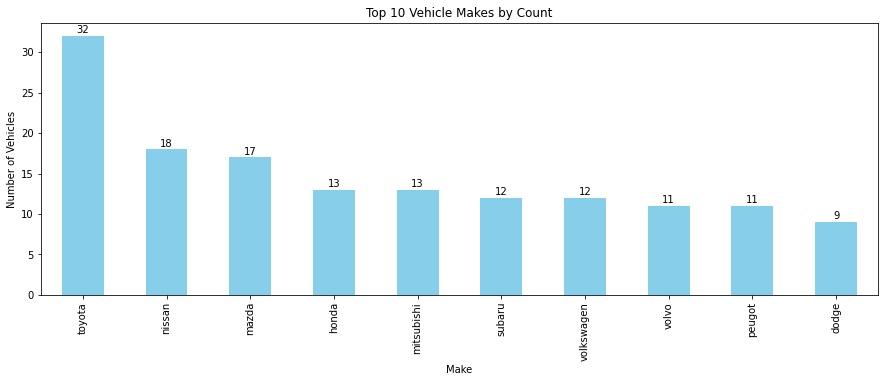

In [12]:
top_makes = automobile['make'].value_counts().nlargest(10)

plt.figure(figsize=(15, 5))
top_makes.plot(kind='bar', color='skyblue')  

# Title and labels
plt.title("Top 10 Vehicle Makes by Count")
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')

# Display the counts on top of the bars
for i, value in enumerate(top_makes):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


### Insurance risk ratings Histogram

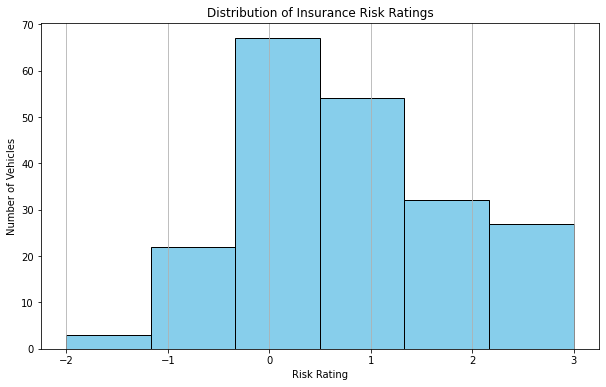

In [13]:
plt.figure(figsize=(10, 6))
automobile['symboling'].hist(bins=6, color='skyblue', edgecolor='black') 


plt.title("Distribution of Insurance Risk Ratings")
plt.xlabel('Risk Rating')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


### Normalized losses histogram

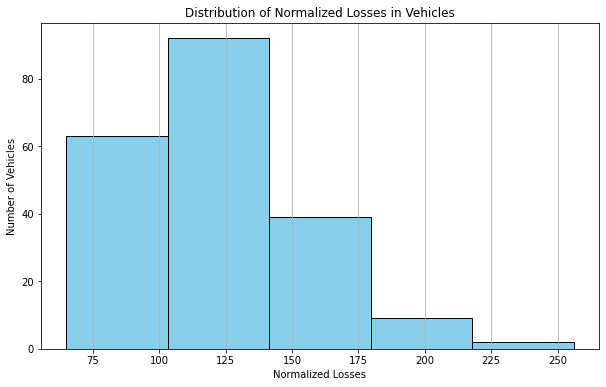

In [14]:
plt.figure(figsize=(10, 6))
automobile['normalized-losses'].hist(bins=5, color='skyblue', edgecolor='black')  

plt.title("Distribution of Normalized Losses in Vehicles")
plt.xlabel('Normalized Losses')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


### Fuel type bar chart

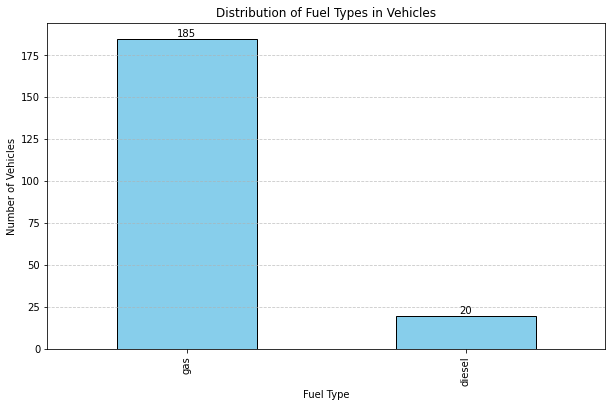

In [15]:
plt.figure(figsize=(10, 6))
fuel_type_counts = automobile['fuel-type'].value_counts()
fuel_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title("Distribution of Fuel Types in Vehicles")
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')

for i, value in enumerate(fuel_type_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Engine type pie diagram

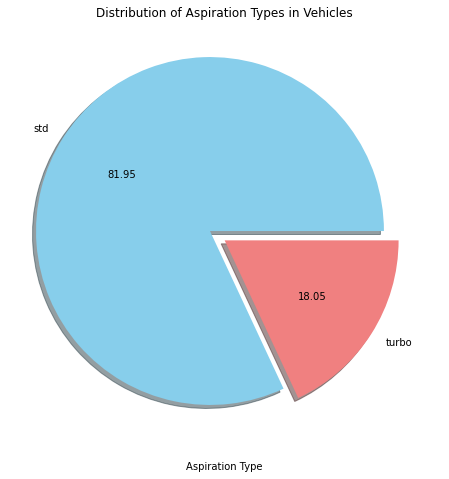

In [16]:
plt.figure(figsize=(8, 8))
aspiration_counts = automobile['aspiration'].value_counts()
aspiration_counts.plot.pie(autopct='%.2f', colors=['skyblue', 'lightcoral'], explode=(0.1, 0), shadow=True)

plt.title("Distribution of Aspiration Types in Vehicles")
plt.xlabel('Aspiration Type')
plt.ylabel('')  
plt.show()


### Horse power histogram

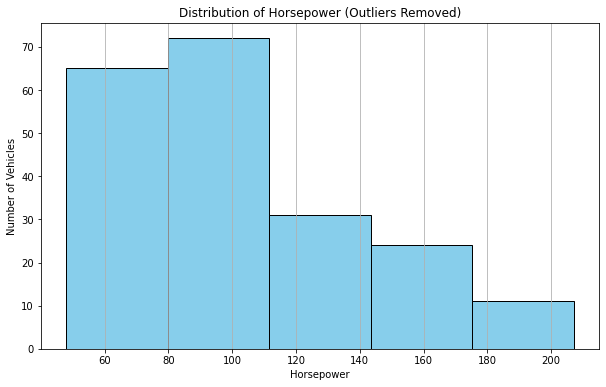

In [17]:
horsepower_filtered = automobile['horsepower'][
    np.abs(automobile['horsepower'] - automobile['horsepower'].mean()) <= (3 * automobile['horsepower'].std())]

plt.figure(figsize=(10, 6))
horsepower_filtered.hist(bins=5, color='skyblue', edgecolor='black') 


plt.title("Distribution of Horsepower (Outliers Removed)")
plt.xlabel('Horsepower')
plt.ylabel('Number of Vehicles')

plt.grid(axis='y', linestyle='--', alpha=0.7)



### Curb weight histogram

<module 'matplotlib.pyplot' from 'C:\\Users\\Mayank Rawat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

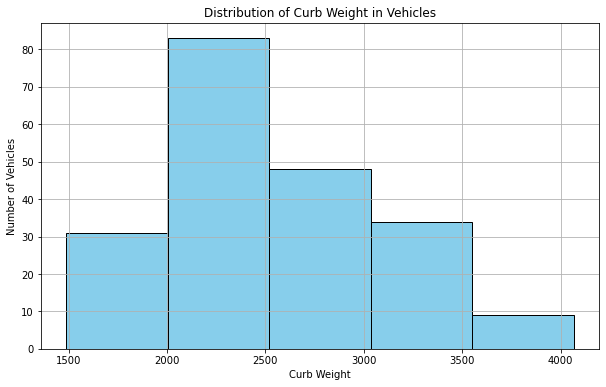

In [18]:
plt.figure(figsize=(10, 6))
automobile['curb-weight'].hist(bins=5, color='skyblue', edgecolor='black')  # Adjust color and edgecolor as needed

plt.title("Distribution of Curb Weight in Vehicles")
plt.xlabel('Curb Weight')
plt.ylabel('Number of Vehicles')


plt


### Drive wheels bar chart

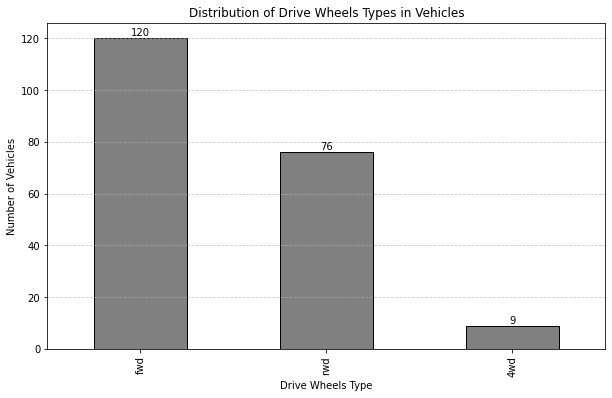

In [19]:
plt.figure(figsize=(10, 6))
drive_wheels_counts = automobile['drive-wheels'].value_counts()
drive_wheels_counts.plot(kind='bar', color='grey', edgecolor='black')  # Adjust color and edgecolor as needed

plt.title("Distribution of Drive Wheels Types in Vehicles")
plt.xlabel('Drive Wheels Type')
plt.ylabel('Number of Vehicles')
for i, value in enumerate(drive_wheels_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Number of doors bar chart

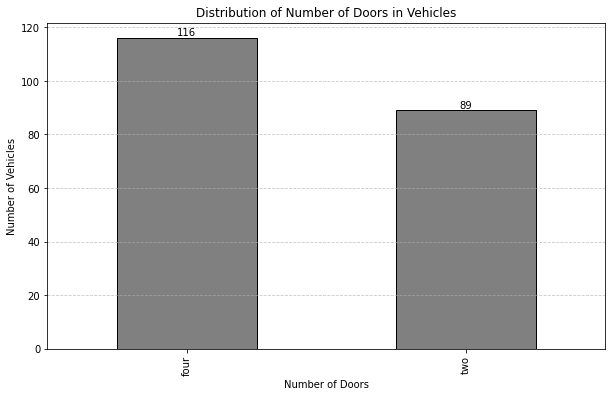

In [20]:
plt.figure(figsize=(10, 6))
doors_counts = automobile['num-of-doors'].value_counts()
doors_counts.plot(kind='bar', color='grey', edgecolor='black')  

plt.title("Distribution of Number of Doors in Vehicles")
plt.xlabel('Number of Doors')
plt.ylabel('Number of Vehicles')


for i, value in enumerate(doors_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Bivariate Analysis

# Heat Map


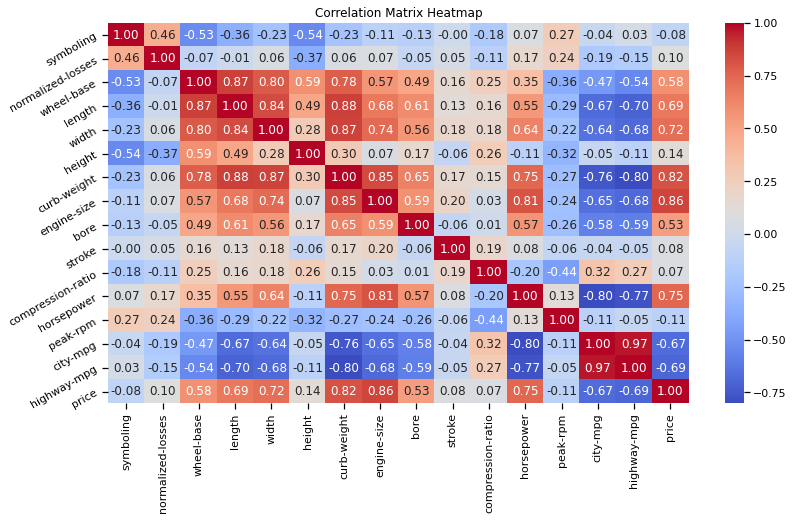

In [21]:
corr_matrix = automobile.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13, 7))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)

plt.title("Correlation Matrix Heatmap")

plt.show()


### Boxplot of Price and make
    

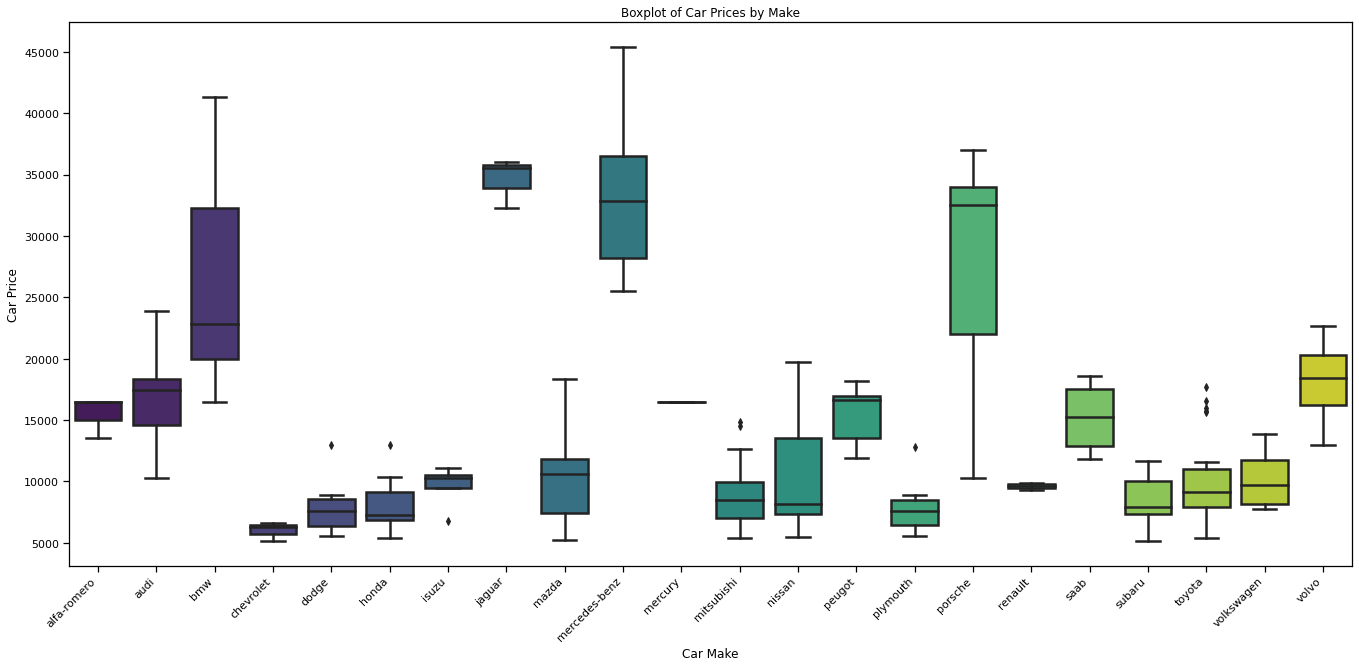

In [22]:
plt.rcParams['figure.figsize'] = (23, 10)

ax = sns.boxplot(x="make", y="price", data=automobile, palette="viridis")  # Adjust palette as needed
ax.set_title("Boxplot of Car Prices by Make")
ax.set_xlabel('Car Make')
ax.set_ylabel('Car Price')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


# Effect on price due to different factos 

# Scatter plot of price and engine size



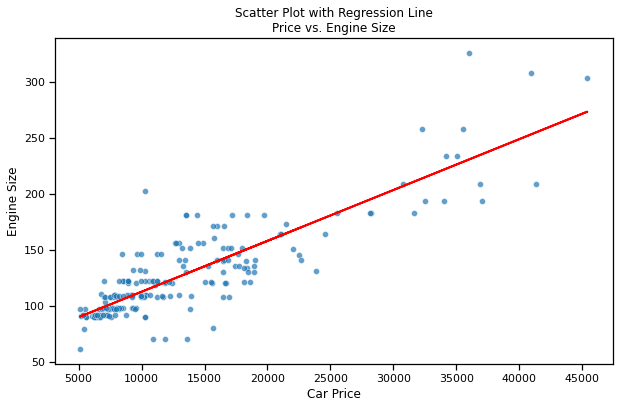

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(automobile['price'], automobile['engine-size'], alpha=0.7, edgecolors='w', linewidth=0.5)

coefficients = np.polyfit(automobile['price'], automobile['engine-size'], 1)
poly_equation = np.poly1d(coefficients)
plt.plot(automobile['price'], poly_equation(automobile['price']), color='red', linewidth=2)
plt.title("Scatter Plot with Regression Line\nPrice vs. Engine Size")
plt.xlabel('Car Price')
plt.ylabel('Engine Size')
plt.show()


# Scatter plot of price and wheel base

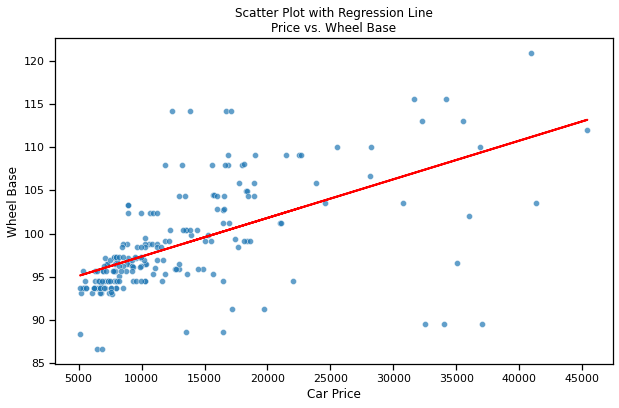

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(automobile['price'], automobile['wheel-base'], alpha=0.7, edgecolors='w', linewidth=0.5)

coefficients = np.polyfit(automobile['price'], automobile['wheel-base'], 1)
poly_equation = np.poly1d(coefficients)
plt.plot(automobile['price'], poly_equation(automobile['price']), color='red', linewidth=2)

plt.title("Scatter Plot with Regression Line\nPrice vs. Wheel Base")
plt.xlabel('Car Price')
plt.ylabel('Wheel Base')
plt.show()


# Scatter plot of price and horsepower

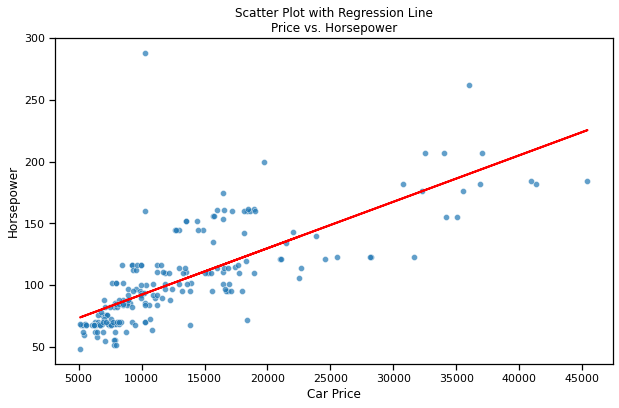

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(automobile['price'], automobile['horsepower'], alpha=0.7, edgecolors='w', linewidth=0.5)

coefficients = np.polyfit(automobile['price'], automobile['horsepower'], 1)
poly_equation = np.poly1d(coefficients)
plt.plot(automobile['price'], poly_equation(automobile['price']), color='red', linewidth=2)

plt.title("Scatter Plot with Regression Line\nPrice vs. Horsepower")
plt.xlabel('Car Price')
plt.ylabel('Horsepower')

plt.show()



# Bar graph of price and horsepower

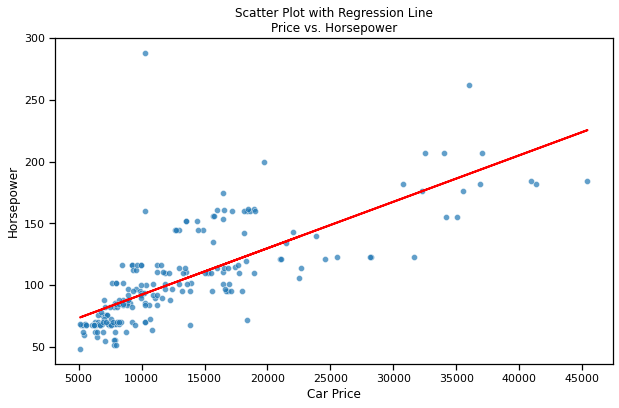

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(automobile['price'], automobile['horsepower'], alpha=0.7, edgecolors='w', linewidth=0.5)

coefficients = np.polyfit(automobile['price'], automobile['horsepower'], 1)
poly_equation = np.poly1d(coefficients)
plt.plot(automobile['price'], poly_equation(automobile['price']), color='red', linewidth=2)

plt.title("Scatter Plot with Regression Line\nPrice vs. Horsepower")
plt.xlabel('Car Price')
plt.ylabel('Horsepower')

plt.show()


# Bar graph of price and number of cylinders

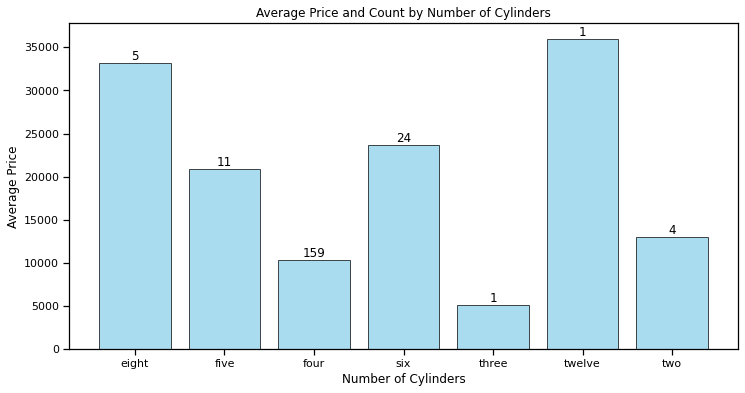

In [27]:
grouped_data = automobile.groupby('num-of-cylinders')['price'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data['num-of-cylinders'], grouped_data['mean'], alpha=0.7, color='skyblue', edgecolor='black')

for bar, count in zip(bars, grouped_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, count, ha='center', va='bottom')

plt.title("Average Price and Count by Number of Cylinders")
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Price')

plt.show()


# Bar graph of price and number of drive wheels

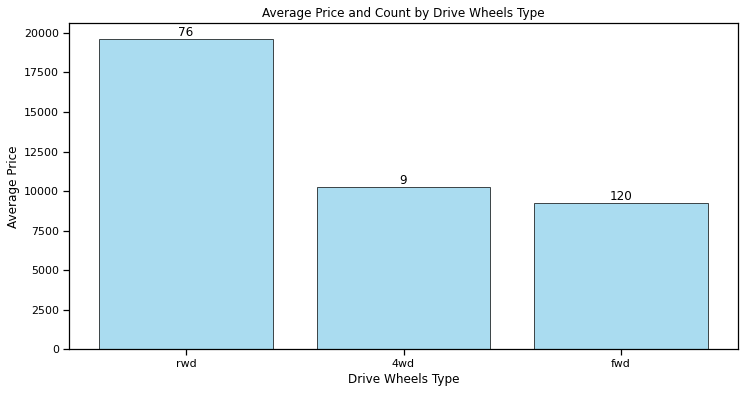

In [28]:
grouped_data = automobile.groupby('drive-wheels')['price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data.index, grouped_data['mean'], alpha=0.7, color='skyblue', edgecolor='black')

for bar, count in zip(bars, grouped_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{count}', ha='center', va='bottom')

plt.title("Average Price and Count by Drive Wheels Type")
plt.xlabel('Drive Wheels Type')
plt.ylabel('Average Price')

plt.show()


# Bar graph of price and number of body style

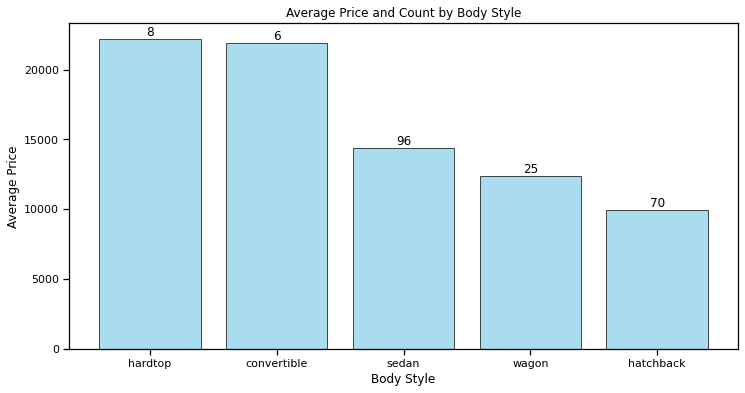

In [29]:
grouped_data = automobile.groupby('body-style')['price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data.index, grouped_data['mean'], alpha=0.7, color='skyblue', edgecolor='black')

for bar, count in zip(bars, grouped_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{count}', ha='center', va='bottom')

plt.title("Average Price and Count by Body Style")
plt.xlabel('Body Style')
plt.ylabel('Average Price')

plt.show()


# Bar graph of price and number of number of doors

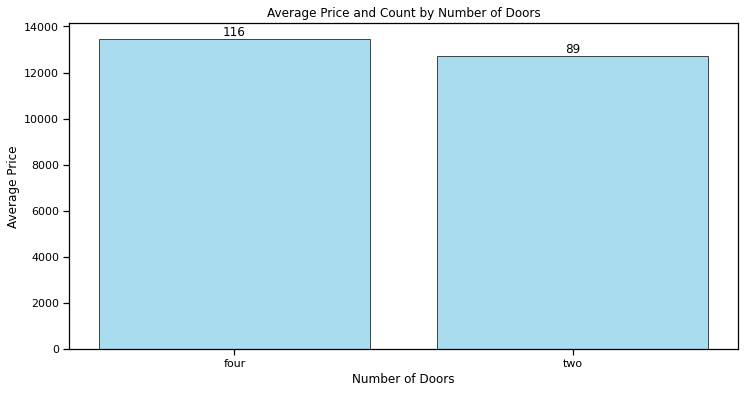

In [30]:
grouped_data = automobile.groupby('num-of-doors')['price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data.index, grouped_data['mean'], alpha=0.7, color='skyblue', edgecolor='black')

for bar, count in zip(bars, grouped_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{count}', ha='center', va='bottom')

plt.title("Average Price and Count by Number of Doors")
plt.xlabel('Number of Doors')
plt.ylabel('Average Price')

plt.show()


# Bar graph of price and number of fuel type

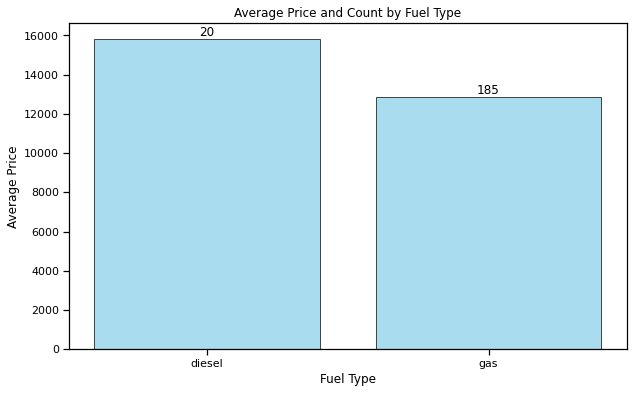

In [31]:
grouped_data = automobile.groupby('fuel-type')['price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data['mean'], alpha=0.7, color='skyblue', edgecolor='black')

for bar, count in zip(bars, grouped_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{count}', ha='center', va='bottom')

plt.title("Average Price and Count by Fuel Type")
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

plt.show()


### Drive wheels and City MPG bar chart

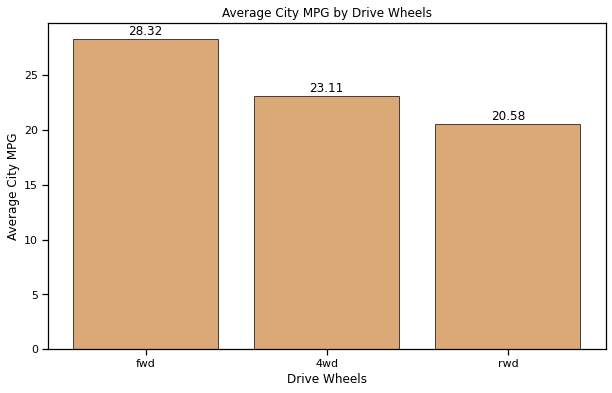

In [34]:
average_city_mpg = automobile.groupby('drive-wheels')['city-mpg'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(average_city_mpg.index, average_city_mpg, color='peru', alpha=0.7, edgecolor='black')

for bar, value in zip(bars, average_city_mpg):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.title("Average City MPG by Drive Wheels")
plt.xlabel('Drive Wheels')
plt.ylabel('Average City MPG')

plt.show()


### Drive wheels and Highway MPG bar chart

<module 'matplotlib.pyplot' from 'C:\\Users\\Mayank Rawat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

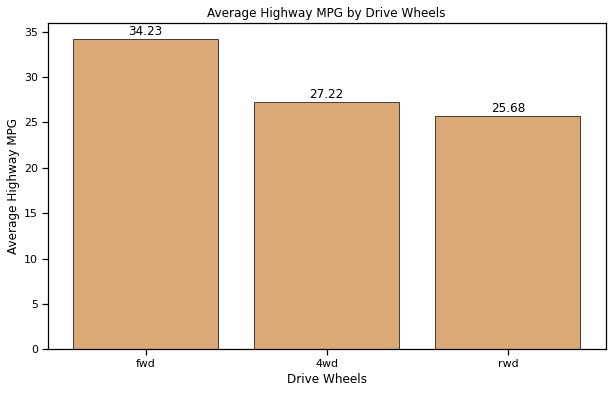

In [35]:
average_highway_mpg = automobile.groupby('drive-wheels')['highway-mpg'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(average_highway_mpg.index, average_highway_mpg, color='peru', alpha=0.7, edgecolor='black')

for bar, value in zip(bars, average_highway_mpg):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.title("Average Highway MPG by Drive Wheels")
plt.xlabel('Drive Wheels')
plt.ylabel('Average Highway MPG')

plt


# PERFORMING FEATURE EXTRACTION,FEATURE SELECTION AND MODEL FITTING 

In [11]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor as XGB

In [12]:
# Separate the target variable (e.g., 'price') and the features
X = automobile.drop(columns=['price'])
y = automobile['price']

In [13]:
# Define categorical and numerical columns
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
numerical_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

In [14]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize numerical data
    ('pca', PCA(n_components=5)) ]) # Apply PCA for feature extraction


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])  # One-hot encoding for categorical data


In [15]:
# Fit and transform the categorical data using the categorical transformer
X_categorical_transformed = categorical_transformer.fit_transform(X[categorical_columns])

# Get the feature names after one-hot encoding
feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_columns)

# Create a DataFrame to display the preprocessed categorical features
categorical_features_df = pd.DataFrame(X_categorical_transformed, columns=feature_names)

# Display the preprocessed categorical features
print(categorical_features_df)


     make_alfa-romero  make_audi  make_bmw  make_chevrolet  make_dodge  \
0                 1.0        0.0       0.0             0.0         0.0   
1                 1.0        0.0       0.0             0.0         0.0   
2                 1.0        0.0       0.0             0.0         0.0   
3                 0.0        1.0       0.0             0.0         0.0   
4                 0.0        1.0       0.0             0.0         0.0   
..                ...        ...       ...             ...         ...   
200               0.0        0.0       0.0             0.0         0.0   
201               0.0        0.0       0.0             0.0         0.0   
202               0.0        0.0       0.0             0.0         0.0   
203               0.0        0.0       0.0             0.0         0.0   
204               0.0        0.0       0.0             0.0         0.0   

     make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  ...  \
0           0.0         0.0   

In [16]:
# Fit and transform the numerical data using the numerical transformer
X_numerical_transformed = numerical_transformer.fit_transform(X[numerical_columns])

# Get the feature names after PCA (in this case, the columns are not explicitly named)

numerical_feature_names = [f'PCA_{i}' for i in range(X_numerical_transformed.shape[1])]

# Create a DataFrame to display the preprocessed numerical features
numerical_features_df = pd.DataFrame(X_numerical_transformed, columns=numerical_feature_names)

# Display the preprocessed numerical features
print(numerical_features_df)


        PCA_0     PCA_1     PCA_2     PCA_3     PCA_4
0   -0.905673  2.402990  0.438615  2.484895 -0.793799
1   -0.905673  2.402990  0.438615  2.484895 -0.793799
2    0.225410  1.182362 -0.537527 -1.080724 -0.735267
3   -0.285718  0.971545 -0.672593 -0.689173  1.391014
4    1.046593  1.806420 -0.306831 -0.827724  1.141537
..        ...       ...       ...       ...       ...
200  2.780463 -1.213252  1.319695 -0.395079  0.107069
201  3.532453 -0.626249  1.523236 -0.364799 -0.196585
202  3.426638 -0.489900  1.976278 -0.265226  0.306607
203  2.281446 -3.148825 -1.487587 -0.688006  0.652693
204  3.195796 -0.956617  1.462842 -0.463025  0.132731

[205 rows x 5 columns]


In [17]:
# Bundle preprocessing for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('pca', PCA(n_components=5))]),
                                 ['symboling', 'normalized-losses',
                                  'wheel-base', 'length', 'width', 'height',
                                  'curb-weight', 'engine-size', 'bore',
                                  'stroke', 'compression-ratio', 'horsepower',
                                  'peak-rpm', 'city-mpg', 'highway-mpg']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 ['make', 'fuel-type', 'aspiration',
                                  'num-of-doors', 'body-style', 'drive-wheels',
                                  'engine-location', 'engine-type',
                                  'num-of-cylinders', 'fuel-system'])])

## Linear Regression 

In [18]:
# Create the final pipeline with preprocessing feature selection and linear regression model
linear_regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('feature_selector', SelectKBest(score_func=f_regression, k=10)),  # Adjust the number of features
                        ('regressor', LinearRegression())])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model
linear_regression_model.fit(X_train, y_train)
r2_score=linear_regression_model.score(X_test,y_test)
print(f"R-squared (R2) Score: {r2_score:.2f}")

R-squared (R2) Score: 0.78


In [19]:
# Define the number of splits for ShuffleSplit
n_splits = 5 

# Create a ShuffleSplit object
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)


cross_val_scores = cross_val_score(linear_regression_model, X, y, cv=shuffle_split, scoring='r2')  

for i, score in enumerate(cross_val_scores, 1):
    print(f"Fold {i}: R-squared (R2) Score: {score:.2f}")

print(f"\nMean R2 Score:", cross_val_scores.mean())  


Fold 1: R-squared (R2) Score: 0.78
Fold 2: R-squared (R2) Score: 0.91
Fold 3: R-squared (R2) Score: 0.24
Fold 4: R-squared (R2) Score: 0.72
Fold 5: R-squared (R2) Score: 0.89

Mean R2 Score: 0.7061136346399934


## Random Forest

In [20]:
Random_Forest_Regressor = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  ])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model
Random_Forest_Regressor.fit(X_train, y_train)

# Evaluate the model
r2_score = Random_Forest_Regressor.score(X_test, y_test)
print(f"R-squared (R2) Score: {r2_score:.2f}")

R-squared (R2) Score: 0.78


In [21]:
# Create a ShuffleSplit object
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Use cross_val_score to perform cross-validation with ShuffleSplit
cross_val_scores = cross_val_score(Random_Forest_Regressor, X_train, y_train, cv=shuffle_split, scoring='r2')  # Use 'r2' or other scoring metrics

for i, score in enumerate(cross_val_scores, 1):
    print(f"Fold {i}: R-squared (R2) Score: {score:.2f}")

print(f"\nMean R2 Score:", cross_val_scores.mean())

Fold 1: R-squared (R2) Score: 0.87
Fold 2: R-squared (R2) Score: 0.92
Fold 3: R-squared (R2) Score: 0.71
Fold 4: R-squared (R2) Score: 0.91
Fold 5: R-squared (R2) Score: -0.43

Mean R2 Score: 0.595665375693599


## Gradient Boosting

In [22]:
from sklearn.metrics import r2_score as sklearn_r2_score 
Gradient_Boosting_Regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
df_GB=Gradient_Boosting_Regressor.fit(X_train, y_train)

# Make predictions
y_pred = df_GB.predict(X_test)

# Evaluate the model
r2_value_model = sklearn_r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2_value_model:.2f}")


R-squared (R2) Score: 0.78


In [23]:
# Create a ShuffleSplit cross-validator
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(Gradient_Boosting_Regressor, X, y, cv=shuffle_split, scoring='r2')

# Display the R2 scores for each fold
for i, score in enumerate(cross_val_scores, 1):
    print(f"Fold {i}: R-squared (R2) Score: {score:.2f}")

# Calculate the mean R2 score across all folds
mean_r2_score = cross_val_scores.mean()
print(f"\nMean R-squared (R2) Score: {mean_r2_score}")

Fold 1: R-squared (R2) Score: 0.78
Fold 2: R-squared (R2) Score: 0.90
Fold 3: R-squared (R2) Score: 0.85
Fold 4: R-squared (R2) Score: 0.94
Fold 5: R-squared (R2) Score: 0.93

Mean R-squared (R2) Score: 0.8814486233752218


## XGBoost

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score as sklearn_r2_score
from xgboost import XGBRegressor
import pandas as pd

# Assuming you have defined 'preprocessor', 'X', and 'y' somewhere before this code

# Define the XGBoost Regressor pipeline
XGBoost_Regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
XGBoost_Regressor.fit(X_train, y_train)

# Make predictions
y_pred = XGBoost_Regressor.predict(X_test)

# Evaluate the model
r2_value = sklearn_r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2_value:.2f}")


R-squared (R2) Score: 0.79


In [25]:
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(XGBoost_Regressor, X, y, cv=shuffle_split, scoring='r2')

# Display the R2 scores for each fold
for i, score in enumerate(cross_val_scores, 1):
    print(f"Fold {i}: R-squared (R2) Score: {score:.2f}")

# Calculate the mean R2 score across all folds
mean_r2_score = cross_val_scores.mean()
print(f"\nMean R-squared (R2) Score: {mean_r2_score}")

Fold 1: R-squared (R2) Score: 0.79
Fold 2: R-squared (R2) Score: 0.91
Fold 3: R-squared (R2) Score: 0.84
Fold 4: R-squared (R2) Score: 0.92
Fold 5: R-squared (R2) Score: 0.92

Mean R-squared (R2) Score: 0.8746218166858682


## Hyperparameter tuning 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import pandas as pd


def find_best_model_using_gridsearchcv(x, y):
    # Define the pipeline with preprocessing and Gradient Boosting model
    model_gb = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ])

    model_xgb = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor())
    ])

    model_rf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    model_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # Define the hyperparameter grid for Gradient Boosting
    param_grid_gb = {
        'regressor__n_estimators': [50, 80, 100], 
        'regressor__learning_rate': [0.01, 0.1, 0.2],  
        'regressor__max_depth': [3, 5, 7],  
        'regressor__min_samples_split': [2, 5, 10], 
        'regressor__min_samples_leaf': [1, 2, 4],  
        'regressor__subsample': [0.8, 0.9, 1.0],  
        'regressor__max_features': ['sqrt', 'log2', None],
    }

    # Define the hyperparameter grid for XGBoost
    param_grid_xgb = {
        'regressor__n_estimators': [50, 80, 100],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 4, 5]
    }

    # Define the hyperparameter grid for Random Forest
    param_grid_rf = {
        'regressor__n_estimators': [50, 80, 100],
        'regressor__max_depth': [None, 10, 20],
    }

    # Define the hyperparameter grid for Linear Regression
    param_grid_lr = {
        'regressor__fit_intercept': [True, False],
        'regressor__copy_X': [True, False],
        'regressor__n_jobs': [None, 1, 2, 4],  # Adjust the values based on your system capabilities
        'regressor__positive': [False],  # 'positive' parameter is specific to scikit-learn version 0.24.0 and later
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Grid search for Gradient Boosting
    gs_gb = GridSearchCV(model_gb, param_grid_gb, cv=cv, return_train_score=False)
    gs_gb.fit(x, y)

    scores.append({
        'model': 'Gradient_Boosting_Regressor',
        'best_score': gs_gb.best_score_,
        'best_params': gs_gb.best_params_
    })

    # Grid search for XGBoost
    gs_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=cv, return_train_score=False)
    gs_xgb.fit(x, y)

    scores.append({
        'model': 'XGBoost_Regressor',
        'best_score': gs_xgb.best_score_,
        'best_params': gs_xgb.best_params_
    })

    # Grid search for Random Forest
    gs_rf = GridSearchCV(model_rf, param_grid_rf, cv=cv, return_train_score=False)
    gs_rf.fit(x, y)

    scores.append({
        'model': 'Random_Forest_Regressor',
        'best_score': gs_rf.best_score_,
        'best_params': gs_rf.best_params_
    })

    # Grid search for Linear Regression
    gs_lr = GridSearchCV(model_lr, param_grid_lr, cv=cv, return_train_score=False)
    gs_lr.fit(x, y)

    scores.append({
        'model': 'Linear_Regression',
        'best_score': gs_lr.best_score_,
        'best_params': gs_lr.best_params_
    })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])



find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,Gradient_Boosting_Regressor,0.904554,"{'regressor__learning_rate': 0.1, 'regressor__..."
1,XGBoost_Regressor,0.871809,"{'regressor__learning_rate': 0.2, 'regressor__..."
2,Random_Forest_Regressor,0.860514,"{'regressor__max_depth': None, 'regressor__n_e..."
3,Linear_Regression,0.848421,"{'regressor__copy_X': True, 'regressor__fit_in..."


In [28]:
result_df = find_best_model_using_gridsearchcv(X, y)

# Display the results
for index, row in result_df.iterrows():
    print(f"Model: {row['model']}")
    print(f"Best Score: {row['best_score']:.4f}")
    print("Best Parameters:")
    for param, value in row['best_params'].items():
        print(f"  {param}: {value}")
    print("\n")
 

Model: Gradient_Boosting_Regressor
Best Score: 0.8958
Best Parameters:
  regressor__learning_rate: 0.1
  regressor__max_depth: 5
  regressor__max_features: None
  regressor__min_samples_leaf: 1
  regressor__min_samples_split: 5
  regressor__n_estimators: 50
  regressor__subsample: 0.9


Model: XGBoost_Regressor
Best Score: 0.8718
Best Parameters:
  regressor__learning_rate: 0.2
  regressor__max_depth: 3
  regressor__n_estimators: 80


Model: Random_Forest_Regressor
Best Score: 0.8614
Best Parameters:
  regressor__max_depth: None
  regressor__n_estimators: 80


Model: Linear_Regression
Best Score: 0.8484
Best Parameters:
  regressor__copy_X: True
  regressor__fit_intercept: False
  regressor__n_jobs: None
  regressor__positive: False


